# Pyber Ride Sharing

## Observation 1:  The more densely populated areas have more drivers, but a proportionately lower amount of rides, and have an even lower total % of total fares.
## Observation 2: The urban areas are more densely saturated with drivers as they provide a much higher average fare.  This might be due to the fact that the trip lengths in the city are longer.
## Observation 3:  Based on the data, I would recommend targeting urban areas for future expansion.  The average fare is higher, and the total fares make up a proportionately lower amount than the other city types.  This signifies that the market saturation is still at a good spot for further expansion.
## Observation 4 (bonus):  WIth just over 60k in total fares for 2016, it seems like this ride share company would be hard pressed to hire a Data Scientist!

In [16]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
#import data and store it in a dataframe
city_file = "raw_data/city_data.csv"
ride_file = "raw_data/ride_data.csv"

city_df = pd.read_csv(city_file)
ride_df = pd.read_csv(ride_file)

In [18]:
#print the first few rows of the city df
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [19]:
#rename columns for a merge later
city_df = city_df.rename(columns={"city":"City", "driver_count":"Driver Count", "type":"Type"})
city_df.head()

,City,Driver Count,Type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [20]:
#print the first few rows of the ride df
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [21]:
#clean up the ride_df
clean_ride_df = ride_df.drop(columns=["ride_id"])
clean_ride_df.head()

,city,date,fare
0,Sarabury,2016-01-16 13:49:27,38.35
1,South Roy,2016-01-02 18:42:34,17.49
2,Wiseborough,2016-01-21 17:35:29,44.18
3,Spencertown,2016-07-31 14:53:22,6.87
4,Nguyenbury,2016-07-09 04:42:44,6.28


In [22]:
#group the ride_df by city for further analysis and rename the fare column
grouped_ride_df = clean_ride_df.groupby(clean_ride_df["city"], as_index=False)
average_fare = grouped_ride_df.mean()
average_fare = average_fare.rename(columns={"fare":"Average Fare", "city":"City"})
average_fare.head()

,City,Average Fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [23]:
#calculate fare amount by city and total fares and rename the fare column
city_fare_amount = grouped_ride_df.sum()
city_fare_amount = city_fare_amount.rename(columns={"city":"City","fare":"Total Fares"})
city_fare_amount.head()

,City,Total Fares
0,Alvarezhaven,741.79
1,Alyssaberg,535.85
2,Anitamouth,335.84
3,Antoniomouth,519.75
4,Aprilchester,417.65


In [24]:
#calculate ride count by city and the total ride count and rename columns appropriately
city_ride_count = clean_ride_df["city"].value_counts()
city_ride_count_df = pd.DataFrame.from_dict(city_ride_count)
city_ride_count_df = city_ride_count_df.reset_index().rename(columns={"index":"City", "city":"Ride Count"})
city_ride_count_df.head()

,City,Ride Count
0,Swansonbury,34
1,Port Johnstad,34
2,Port James,32
3,South Louis,32
4,Jacobfort,31


In [25]:
#create a new df and group by city type
new_df = pd.merge(city_df, average_fare, on="City")
combined_df = pd.merge(new_df, city_fare_amount, on="City")
combined_df = pd.merge(combined_df, city_ride_count_df, on="City")
grouped_city_type = combined_df.groupby(combined_df["Type"], as_index=False)
total_city_type = grouped_city_type.sum()
total_city_type["Type"] = ["Rural", "Suburban", "Urban"]
total_city_type

,Driver Count,Average Fare,Total Fares,Ride Count,Type
0,104,615.728572,4255.09,125,Rural
1,638,1300.433953,20335.69,657,Suburban
2,2607,1623.863390,40078.34,1625,Urban


# Bubble Plot of Rideshare Data

In [26]:
#create separate dataframes based on the 3 different city types
urban_data = combined_df.loc[combined_df["Type"] == "Urban"]
suburban_data = combined_df.loc[combined_df["Type"] == "Suburban"]
rural_data = combined_df.loc[combined_df["Type"] == "Rural"]

Text(0.5,1,'Pyber Ride Sharing Data (2016)')

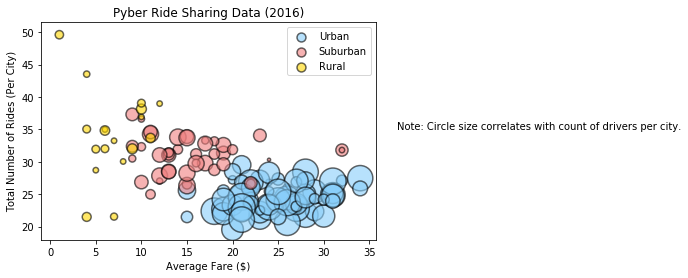

In [27]:
#Plot our data on a scatter plot
urban = plt.scatter(urban_data["Ride Count"], urban_data["Average Fare"], marker="o", facecolors ="lightskyblue", edgecolors="black",
            s=urban_data["Driver Count"]*10, alpha=0.6, linewidths=1.5, label = "Urban")
suburban = plt.scatter(suburban_data["Ride Count"], suburban_data["Average Fare"], marker="o", facecolors ="lightcoral", edgecolors="black",
            s=suburban_data["Driver Count"]*10, alpha=0.6, linewidths=1.5, label = "Suburban")
rural = plt.scatter(rural_data["Ride Count"], rural_data["Average Fare"], marker="o", facecolors ="gold", edgecolors="black",
            s=rural_data["Driver Count"]*10, alpha=0.6, linewidths=1.5, label = "Rural")

#set up the legend for the scatter plot
legend = plt.legend(handles=[urban, suburban, rural])
legend.legendHandles[0]._sizes = [80]
legend.legendHandles[1]._sizes = [80]
legend.legendHandles[2]._sizes = [80]

#add in a chart title, axis titles, and notes
text = "Note: Circle size correlates with count of drivers per city."
plt.text(38,35,text)
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.title("Pyber Ride Sharing Data (2016)")

# Total Fares by City Type

Text(0.5,1,'% of Total Fares by City Type')

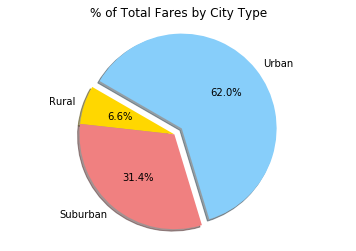

In [28]:
#create a pie chart for % of Total Fares by City Type

# Labels for the sections of our pie chart
labels = total_city_type["Type"]

# The values of each section of the pie chart
sizes = total_city_type["Total Fares"]

# The colors of each section of the pie chart
colors = ["gold","lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.1)

#plot our data on a pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# give our plot a title
plt.title("% of Total Fares by City Type")

# Total Rides by City Type

Text(0.5,1,'% of Total Rides by City Type')

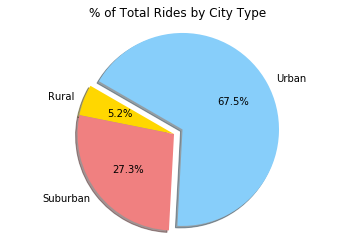

In [14]:
#create a pie chart for % of Total Rides by City Type

# Labels for the sections of our pie chart
labels = total_city_type["Type"]

# The values of each section of the pie chart
sizes = total_city_type["Ride Count"]

# The colors of each section of the pie chart
colors = ["gold","lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.1)

#plot our data on a pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# give our chart a title
plt.title("% of Total Rides by City Type")

# Total Drivers by City Type

Text(0.5,1,'% of Total Drivers by City Type')

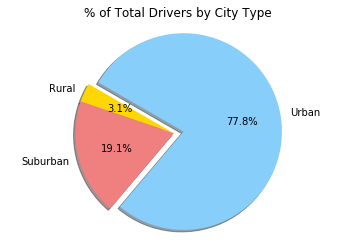

In [15]:
# create a pie chart for % of Total Drivers by City Type

# Labels for the sections of our pie chart
labels = total_city_type["Type"]

# The values of each section of the pie chart
sizes = total_city_type["Driver Count"]

# The colors of each section of the pie chart
colors = ["gold","lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.1)

#plot our data on a pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

#give our chart a title
plt.title("% of Total Drivers by City Type")